# **LOAD DATA**

In [1]:
# load dataset kedalam dataframe

import pandas as pd
import numpy as np

df = pd.read_csv('E:\\[ DOCUMENTS ]\\GUNADARMA\\PENULISAN ILMIAH\\Project\\Jupyter-project\\Datasets\\reviews-tokopedia-juni.csv')
print(df.shape)

(4490, 3)


In [2]:
# melihat data

df.head()

,nama,ulasan,penilaian
0,Ardison Samsung,Bagi saya Tokopedia merupakan Online Shop yang...,5
1,samsudin elfani,"Belanja paling aman ?? Tokopedia tentunya, Tok...",5
2,Dhika Rahmawati,"Pernah bikin akun tapi g pernah transaksi, Pas...",1
3,Reza Fisabilillah,Kemaren banyak gambar yg gk bisa kebuka pas di...,3
4,Haviza Yeni official,Saya mau tanya kenapa ditoko y g mau saya beli...,2


In [3]:
# melihat banyak ulasan dari tiap penilaian

df['penilaian'].value_counts()

5    2251
1    1331
4     345
3     302
2     261
Name: penilaian, dtype: int64

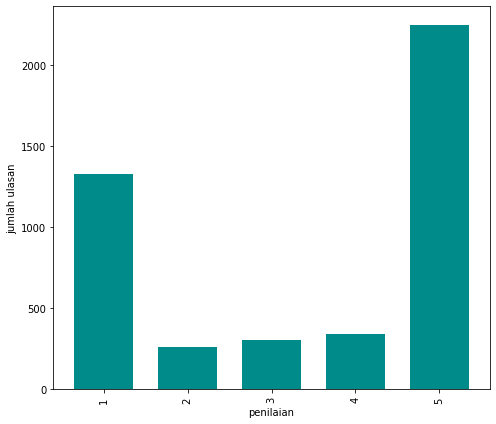

In [4]:
# melihat distribusi banyak ulasan berdasarkan penilaian

import matplotlib.pyplot as plt

_, ax1 = plt.subplots(figsize=(7,6))
stars_histogram = df['penilaian'].value_counts().sort_index()
stars_histogram.plot(kind='bar', width=0.7, color='darkcyan')
plt.xlabel('penilaian')
plt.ylabel('jumlah ulasan')

plt.tight_layout()
plt.show()

# **PREPROCESSING**

**Remove Empty Data Line**

menghapus baris data yang kosong

In [5]:
df = df.dropna()
print(df.shape)

(4490, 3)


**Case Folding**

mengubah semua huruf menjadi huruf kecil

In [6]:
df['ulasan'] = df['ulasan'].str.lower()
df.head()

,nama,ulasan,penilaian
0,Ardison Samsung,bagi saya tokopedia merupakan online shop yang...,5
1,samsudin elfani,"belanja paling aman ?? tokopedia tentunya, tok...",5
2,Dhika Rahmawati,"pernah bikin akun tapi g pernah transaksi, pas...",1
3,Reza Fisabilillah,kemaren banyak gambar yg gk bisa kebuka pas di...,3
4,Haviza Yeni official,saya mau tanya kenapa ditoko y g mau saya beli...,2


In [7]:
df.to_csv('hasil case folding.csv')

**Cleansing**

pembersihan teks dari tab, new line, back slice, mention, link, hastag dan URL

In [8]:
import string
import re # regex library

def remove_ulasan_special(text):
  # menghapus tab, new line, dan back slice
  text = text.replace('\\t', " ").replace('\\n', " ").replace('\\', "")

  # menghapus non ASCII (emoticon, chinese word, dll)
  text = text.encode('ascii', 'replace').decode('ascii')

  # menghapus mention, link, hastag
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())

  # menghapus incomplete URL
  return text.replace("http://", " ").replace("https://", " ")

df['ulasan'] = df['ulasan'].apply(remove_ulasan_special)
df.head()

,nama,ulasan,penilaian
0,Ardison Samsung,bagi saya tokopedia merupakan online shop yang...,5
1,samsudin elfani,"belanja paling aman ?? tokopedia tentunya, tok...",5
2,Dhika Rahmawati,"pernah bikin akun tapi g pernah transaksi, pas...",1
3,Reza Fisabilillah,kemaren banyak gambar yg gk bisa kebuka pas di...,3
4,Haviza Yeni official,saya mau tanya kenapa ditoko y g mau saya beli...,2


In [9]:
df.to_csv('hasil cleansing.csv')

**Remove Number**

menghapus angka

In [10]:
def remove_number(text):
  return re.sub(r"\d+", "", text)

df['ulasan'] = df['ulasan'].apply(remove_number)
df.head()

,nama,ulasan,penilaian
0,Ardison Samsung,bagi saya tokopedia merupakan online shop yang...,5
1,samsudin elfani,"belanja paling aman ?? tokopedia tentunya, tok...",5
2,Dhika Rahmawati,"pernah bikin akun tapi g pernah transaksi, pas...",1
3,Reza Fisabilillah,kemaren banyak gambar yg gk bisa kebuka pas di...,3
4,Haviza Yeni official,saya mau tanya kenapa ditoko y g mau saya beli...,2


In [11]:
df.to_csv('hasil remove number.csv')

**Remove Punctuation**

menghapus tanda baca

In [12]:
def remove_punctuation(text):
  return text.translate(str.maketrans("", "", string.punctuation))

df['ulasan'] = df['ulasan'].apply(remove_punctuation)
df.head()

,nama,ulasan,penilaian
0,Ardison Samsung,bagi saya tokopedia merupakan online shop yang...,5
1,samsudin elfani,belanja paling aman tokopedia tentunya tokope...,5
2,Dhika Rahmawati,pernah bikin akun tapi g pernah transaksi pas ...,1
3,Reza Fisabilillah,kemaren banyak gambar yg gk bisa kebuka pas di...,3
4,Haviza Yeni official,saya mau tanya kenapa ditoko y g mau saya beli...,2


In [13]:
df.to_csv('hasil remove punctuation.csv')

**Remove Single Char**

menghapus huruf tunggal (tidak berbentuk kata)

In [14]:
def remove_single_char(text):
  return re.sub(r"\b[a-zA-Z]\b", "", text)

df['ulasan'] = df['ulasan'].apply(remove_single_char)
df.head()

,nama,ulasan,penilaian
0,Ardison Samsung,bagi saya tokopedia merupakan online shop yang...,5
1,samsudin elfani,belanja paling aman tokopedia tentunya tokope...,5
2,Dhika Rahmawati,pernah bikin akun tapi pernah transaksi pas r...,1
3,Reza Fisabilillah,kemaren banyak gambar yg gk bisa kebuka pas di...,3
4,Haviza Yeni official,saya mau tanya kenapa ditoko mau saya beli b...,2


In [15]:
df.to_csv('hasil remove single char.csv')

**Tokenizing**

pemisahan teks menjadi potongan-potongan kata yang disebut sebagai token

In [16]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
  return word_tokenize(text)

df['ulasan'] = df['ulasan'].apply(word_tokenize_wrapper)
df.head()

[nltk_data] Downloading package punkt to C:\Users\Ramdani
[nltk_data]     Adan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,nama,ulasan,penilaian
0,Ardison Samsung,"[bagi, saya, tokopedia, merupakan, online, sho...",5
1,samsudin elfani,"[belanja, paling, aman, tokopedia, tentunya, t...",5
2,Dhika Rahmawati,"[pernah, bikin, akun, tapi, pernah, transaksi,...",1
3,Reza Fisabilillah,"[kemaren, banyak, gambar, yg, gk, bisa, kebuka...",3
4,Haviza Yeni official,"[saya, mau, tanya, kenapa, ditoko, mau, saya, ...",2


In [17]:
df.to_csv('hasil tokenizing.csv')

**Spell Normalization**

menyeragamkan kata yang memiliki makna yang sama namun penulisannya berbeda

In [18]:
normalized_word = pd.read_excel(open('E:\\[ DOCUMENTS ]\\GUNADARMA\\PENULISAN ILMIAH\\Project\\Jupyter-project\\Datasets\\normalisasi.xlsx', 'rb'), sheet_name='Sheet1')
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
  if row[0] not in normalized_word_dict:
    normalized_word_dict[row[0]] = row[1]

def normalized_term(document):
  return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df['ulasan'] = df['ulasan'].apply(normalized_term)
df.head()

,nama,ulasan,penilaian
0,Ardison Samsung,"[bagi, saya, tokopedia, rupa, online, shop, ya...",5
1,samsudin elfani,"[belanja, paling, aman, tokopedia, tentunya, t...",5
2,Dhika Rahmawati,"[pernah, bikin, akun, tapi, pernah, transaksi,...",1
3,Reza Fisabilillah,"[kemarin, banyak, gambar, yg, tidak, bisa, buk...",3
4,Haviza Yeni official,"[saya, mau, tanya, kenapa, toko, mau, saya, be...",2


In [19]:
df.to_csv('hasil spell normalization.csv')

**Filtering**

memfilter untuk mengambil kata-kata penting dengan menggunakan algoritma *stoplist* (membuang kata kurang penting)

*stopword* adalah kata umum yang biasa muncul dalam jumlah besar dan dianggap tidak memiliki makna

contoh stopword dalam bahasa Indonesia adalah "yang", "dan", "di", "dari", "dengan", "untuk", dll

In [20]:
# import stopword from NLTK
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# dapatkan stopword indonesia dari NLTK stopword
list_stopwords = stopwords.words('indonesian')
print(len(list_stopwords))

# menambahkan stopword tambahan
list_stopwords.extend(['pas', 'ya', 'sih', 'deh', 'loh', 'oiya', 'nih', 'ok',
                       'eh', 'yg', 'dg', 'rt', 'dgn', 'ny', 'klo', 'kalo',
                       'amp', 'biar', 'bikin', 'bilang', 'gak', 'ga', 'krn',
                       'nya', 'si', 'tau', 'tdk', 'tuh', 'utk', 'jd', 'jgn',
                       'sdh', 'aja', 'nyg', 'hehe', 'pen', 'nan', 'rt',
                       '&amp', 'yah', 'oy', 'jir'])

# menambahkan stopword dari file csv
txt_stopword = pd.read_csv('E:\[ DOCUMENTS ]\GUNADARMA\PENULISAN ILMIAH\Project\Jupyter-project\Datasets\stopword_indonesia.txt', names=['stopwords'], header = None)

# mengkonversi kata stopword tambahan & stopword pada file csv ke list
list_stopwords.extend(txt_stopword['stopwords'][0].split(' '))

# mengkonversi list ke dictionary
list_stopwords = set(list_stopwords)

# menghapus stopword pada data
def stopwords_removal(words):
  return [word for word in words if word not in list_stopwords]

df['ulasan'] = df['ulasan'].apply(stopwords_removal)
df.head()

[nltk_data] Downloading package stopwords to C:\Users\Ramdani
[nltk_data]     Adan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


758


,nama,ulasan,penilaian
0,Ardison Samsung,"[percaya, keren, banget]",5
1,samsudin elfani,"[aman, emang, bantu, promo, ongkir, gratis, ka...",5
2,Dhika Rahmawati,"[akun, transaksi, ramai, gabung, unduh, promo,...",1
3,Reza Fisabilillah,"[kemarin, gambar, buka, buka, gara, gara, siny...",3
4,Haviza Yeni official,"[beli, bayar, tolong, solusi]",2


In [21]:
df.to_csv('hasil filtering.csv')

In [22]:
df.to_csv('hasil preprocessing.csv')

In [23]:
# load data hasil preprocessing kedalam dataframe

import pandas as pd
import numpy as np

df = pd.read_csv('E:\\[ DOCUMENTS ]\\GUNADARMA\\PENULISAN ILMIAH\\Project\\Jupyter-project\\hasil preprocessing.csv', usecols=['nama', 'ulasan', 'penilaian'])
df.columns = ['nama', 'ulasan', 'penilaian']

df.head()

,nama,ulasan,penilaian
0,Ardison Samsung,"['percaya', 'keren', 'banget']",5
1,samsudin elfani,"['aman', 'emang', 'bantu', 'promo', 'ongkir', ...",5
2,Dhika Rahmawati,"['akun', 'transaksi', 'ramai', 'gabung', 'undu...",1
3,Reza Fisabilillah,"['kemarin', 'gambar', 'buka', 'buka', 'gara', ...",3
4,Haviza Yeni official,"['beli', 'bayar', 'tolong', 'solusi']",2


In [24]:
# menggabungkan daftar token menjadi dokumen string tunggal

import ast

## def eval_code(code):
    ## parsed = ast.parse(code, mode='eval')
    ## fixed = ast.fix_missing_locations(parsed)
    ## compiled = compile(fixed, '<string>', 'eval')
    ## eval(compiled)

def join_text_list(texts):
  texts = ast.literal_eval(texts)
  return ' '.join([text for text in texts])

df['ulasan'] = df['ulasan'].apply(join_text_list)
df.head()

,nama,ulasan,penilaian
0,Ardison Samsung,percaya keren banget,5
1,samsudin elfani,aman emang bantu promo ongkir gratis kasih kasih,5
2,Dhika Rahmawati,akun transaksi ramai gabung unduh promo coba b...,1
3,Reza Fisabilillah,kemarin gambar buka buka gara gara sinyal down...,3
4,Haviza Yeni official,beli bayar tolong solusi,2


In [25]:
df.to_csv('hasil.csv')

In [26]:
import difflib

#body_list = df['body'].tolist()
review_text_list = df['ulasan'].tolist()

#body = body_list
reviews = review_text_list
s = difflib.SequenceMatcher(None, reviews).ratio()
print("ratio: ", s, "\n")
df.head()

ratio:  0.0 



,nama,ulasan,penilaian
0,Ardison Samsung,percaya keren banget,5
1,samsudin elfani,aman emang bantu promo ongkir gratis kasih kasih,5
2,Dhika Rahmawati,akun transaksi ramai gabung unduh promo coba b...,1
3,Reza Fisabilillah,kemarin gambar buka buka gara gara sinyal down...,3
4,Haviza Yeni official,beli bayar tolong solusi,2


# **FREKUENSI & TFIDF**

In [27]:
# fungsi untuk memplot term yang paling sering muncul

from nltk import FreqDist
import seaborn as sns

def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # memilih 25 term yang paling sering muncul
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(25, 7))
  ax = sns.barplot(data=d, x = "word", y = "count")
  ax.set(ylabel = "Count")
  plt.show()

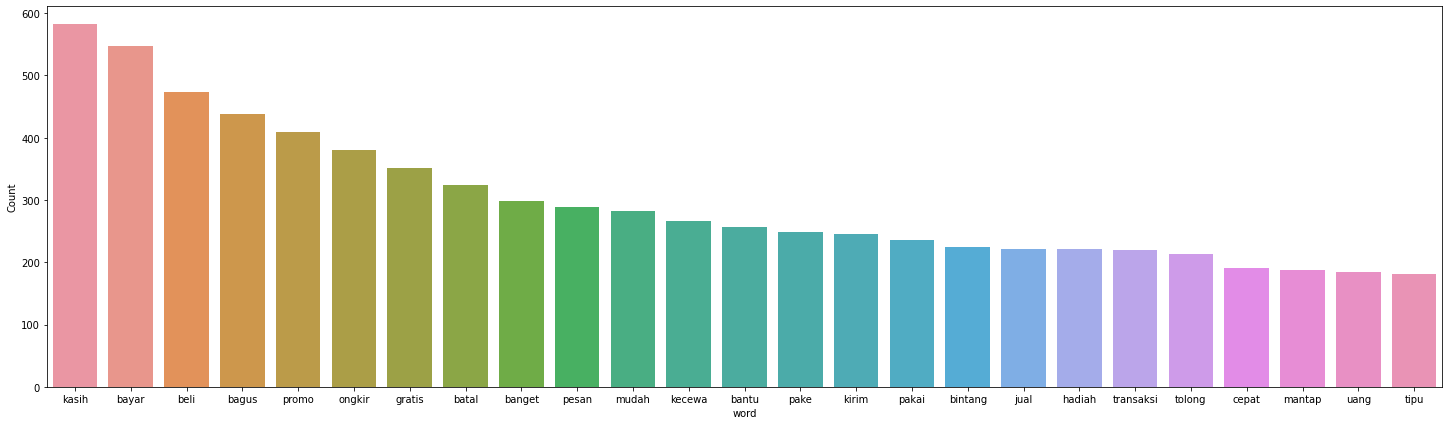

In [28]:
# plot term yang paling sering

freq_words(df['ulasan'], 25)

In [29]:
# Mengubah dokumen kata kedalam bentuk vector

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cvec = CountVectorizer(stop_words='english', min_df=1, max_df=.5, ngram_range=(1, 2))
cvec

CountVectorizer(max_df=0.5, ngram_range=(1, 2), stop_words='english')

In [30]:
# menghitung semua n-gram yang ditemukan di semua dokumen

from itertools import islice
from nltk.corpus import stopwords
global str

cvec.fit(review_text_list)
list(islice(cvec.vocabulary_.items(), 20))

len(cvec.vocabulary_)

29829

In [31]:
cvec = CountVectorizer(stop_words='english', min_df=.0025, max_df=.5, ngram_range=(1, 2))
cvec.fit(review_text_list)
len(cvec.vocabulary_)

458

In [32]:
cvec_counts = cvec.transform(review_text_list)
print('sparse matrix shape: ', cvec_counts.shape)
print('nonzero count: ', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[0])))

sparse matrix shape:  (4490, 458)
nonzero count:  20653
sparsity: 0.10%


In [33]:
# menghitung frekuensi kemunculan term

occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names_out(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)

,term,occurrences
190,kasih,582
43,bayar,548
53,beli,474
26,bagus,438
335,promo,410
294,ongkir,381
140,gratis,352
38,batal,324
32,banget,299
322,pesan,289


In [34]:
# sekarang kita memiliki jumlah term untuk setiap dokumen kita dapat menggunakan TFIDF Transformer untuk menghitung
# bobot untuk setiap istilah dalam setiap dokumen

transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<4490x458 sparse matrix of type '<class 'numpy.float64'>'
	with 20653 stored elements in Compressed Sparse Row format>

In [35]:
# melihat 20 term teratas dengan weight rata-rata TFIDF

weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names_out(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
26,bagus,0.040518
190,kasih,0.036805
270,mudah,0.028807
43,bayar,0.028423
36,bantu,0.026991
53,beli,0.025727
335,promo,0.024814
140,gratis,0.024246
255,mantap,0.022773
294,ongkir,0.021643


# **PELABELAN**

In [36]:
# membuat kamus data

word_dict = {}
for i in range(0, len(df['ulasan'])):
  sentence = df['ulasan'][i]
  word_token = word_tokenize(sentence)
  for j in word_token:
    if j not in word_dict:
      word_dict[j] = 1
    else:
      word_dict[j] += 1

In [37]:
len(word_dict)

6722

In [38]:
len({k:v for (k, v) in word_dict.items() if v < 4})

5656

In [39]:
# import lexicon, dan hapus kata-kata negasi dari leksikon

negasi = ['bukan', 'tidak', 'ga', 'gk', 'gak']
lexicon = pd.read_csv('E:\\[ DOCUMENTS ]\\GUNADARMA\\PENULISAN ILMIAH\\Project\\Jupyter-project\\Datasets\\modified_full_lexicon_indo.csv')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan' )
                                |(lexicon['word'] == 'tidak')
                                |(lexicon['word'] == 'ga')
                                |(lexicon['word'] == 'gk')
                                |(lexicon['word'] == 'engga')
                                |(lexicon['word'] == 'ngga')
                                |(lexicon['word'] == 'kaga')
                                |(lexicon['word'] == 'kagak')
                                |(lexicon['word'] == 'gak')].index, axis=0)
lexicon = lexicon.reset_index(drop=True)

In [40]:
len(lexicon)

10246

In [41]:
lexicon.head(10)

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1
5,pernik,3,1
6,belas,2,1
7,welas,4,1
8,kabung,1,1
9,rahayu,4,1


In [42]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

In [43]:
len(lexicon_word)

10246

In [44]:
# memeriksa apakah ada kata dalam kamus yang tidak termasuk dalam lexicon

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()

for word in word_dict.keys():
  if word not in lexicon_word:
    kata_dasar = stemmer.stem(word)
    if kata_dasar not in lexicon_word:
      ns_words.append(word)

len(ns_words)

5557

In [45]:
# melihat jenis kata, dimulai dengan beberapa kata yang memiliki banyak kemunculan
# karena kemungkinan besar ini bukan tipe case

len({k:v for (k, v) in word_dict.items() if ((k in ns_words) & (v > 3))})

621

In [46]:
ns_words_list = {k:v for (k, v) in word_dict.items() if ((k in ns_words) & (v > 3))}

In [47]:
# ternyata kata-kata yang tidak termasuk dalam lexicon, adalah kata yang tidak memiliki arti sentimen

sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)
sort_ordes = sort_orders[0:20]

for i in sort_orders:
  print(i[0], i[1])

ongkir 381
kecewa 267
pake 248
pakai 236
bintang 225
uang 185
tipu 181
akun 154
cod 154
udh 119
cashback 115
rp 110
seller 102
karna 94
kurir 78
order 77
aman 76
fitur 76
alamat 75
langgar 74
shopee 73
alas 64
keren 52
emang 51
instal 50
refund 50
dibatalin 49
indonesia 48
sya 46
ribu 46
panen 45
traktiran 44
best 44
vocer 43
tpi 43
tulis 43
telur 43
maju 43
komplain 42
kendala 42
batalin 42
rupiah 42
bank 42
cancel 41
sen 41
gabisa 41
niat 40
cs 40
cuman 40
ko 40
app 39
iklan 39
nomor 38
transfer 38
ngga 38
duit 37
tgl 37
konsumen 37
dipake 37
via 36
gopay 36
gue 35
sandi 35
menu 34
rekening 34
login 33
syarat 33
nama 33
ulas 33
ku 33
jt 33
checkout 32
jam 32
driver 32
tetep 32
minggu 31
biaya 31
admin 31
ubah 31
verifikasi 30
berat 30
knp 30
ulang 29
klik 29
point 29
payah 29
apl 29
ad 29
bingung 28
email 27
gilir 27
blanja 27
up 27
internet 26
klaim 26
ditokopedia 26
kemarin 25
marketplace 25
utama 25
bangsa 25
brg 25
nipu 24
lazada 24
uninstall 24
dasar 24
pdhl 24
juni 23
google 23

In [48]:
# sentimen

lexicon['number_of_words'].value_counts()

1    9534
2     686
3      24
4       2
Name: number_of_words, dtype: int64

In [49]:
'pekerti' in word_dict

False

In [50]:
'baik' in lexicon_word

True

In [51]:
# menghitung sentimen kata dengan mgnghitungnya menjadi lexicon

sencol = []
senrow = np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []

# fungsi untuk menuliskan sentimen kata jika sudah ditemukan
def found_word(ind, words, word, sen, sencol, sentiment, add):
  
  # jika sudah termasuk dalam bug of words matrix, maka naikkan (tambahkan) saja nilaiinya
  if word in sencol:
    sen[sencol.index(word)] += 1
  
  # jika tidak, maka tambahkan kata baru
  else:
    sencol.append(word)
    sen.append(1)
    add += 1
  
  if (words[ind-1] in negasi):
    sentiment += -lexicon['weight'][lexicon_word.index(word)]
  else:
    sentiment += lexicon['weight'][lexicon_word.index(word)]

  return sen, sencol, sentiment, add

# memeriksa setiap kata, jika muncul dalam lexicon, dan kemudian menghitung sentimennya
for i in range(len(df)):
  nsen = senrow.shape[0]
  words = word_tokenize(df['ulasan'][i])
  sentiment = 0
  add = 0
  prev = [0 for ii in range (len(words))]
  n_words = len(words)
  
  if len(sencol)>0:
    sen = [0 for j in range(len(sencol))]
  else:
    sen = []

  for word in words:
    ind = words.index(word)
    
    # periksa apakah termasuk kedalam lexicon
    if word in lexicon_word:
      sen, sencol, sentiment, add = found_word(ind, words, word, sen, sencol, sentiment, add)
    
    # jika tidak, maka periksa kata dasarnya
    else:  
      kata_dasar = stemmer.stem(word)
      
      if kata_dasar in lexicon_word:
        sen, sencol, sentiment, add = found_word(ind, words, kata_dasar, sen, sencol, sentiment, add)

      # jika masih negatif, cocokkan kombinasi kata dengan kata yang berdekatan
      elif (n_words>1):
        if ind-1>-1:
          back_1 = words[ind-1] + ' ' + word
          if (back_1 in lexicon_word):
            sen, sencol, sentiment, add = found_word(ind, words, back_1, sen, sencol, sentiment, add)
          elif (ind-2>-1):
            back_2 = words[ind-2] + ' ' + back_1
            if back_2 in lexicon_word:
              sen, sencol, sentiment, add = found_word(ind, words, back_2, sen, sencol, sentiment, add)
  
  # jika ada kata baru yang ditemukan, maka perluas matriks
  if add > 0:
    if i > 0:
      if (nsen == 0):
        senrow = np.zeros([i, add], dtype=int)
      elif (i != nsen):
        padding_h = np.zeros([nsen, add], dtype=int)
        senrow = np.hstack((senrow, padding_h))
        padding_v = np.zeros([(i-nsen), senrow.shape[1]], dtype=int)
        senrow = np.vstack((senrow, padding_v))
      else:
        padding = np.zeros([nsen, add], dtype=int)
        senrow = np.hstack((senrow, padding))
      
      senrow = np.vstack((senrow, sen))
    
    if i == 0:
      senrow = np.array(sen).reshape(1, len(sen))

  # jika tidak ada maka perbarui matriks lama
  elif (nsen>0):
    senrow = np.vstack((senrow, sen))

  sentiment_list.append(sentiment)

In [52]:
# membangun kerangka data yang berisi sekumpulan kata dan sentimen yang telah dihitung sebelumnya

sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0], 1)
sentiment_data = np.hstack((senrow, sentiment_array))
df_sen = pd.DataFrame(sentiment_data, columns = sencol)

In [53]:
df_sen.head(5)

,percaya,banget,bantu,promo,gratis,kasih,transaksi,ramai,gabung,coba,...,inovasi,perban,musik,aliansi,enjoy,lampu,drastis,meleset,pandai,sentiment
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,1,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
2,0,0,0,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,11
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [54]:
df_sen.to_csv('hasil_data_sentimen.csv')

In [55]:
# melihat sentimen dari data original

res_df = pd.DataFrame([])
res_df['penilaian'] = df['penilaian'].copy()
res_df['nama'] = df['nama'].copy()
res_df['ulasan'] = df['ulasan'].copy()
res_df['sentimen'] = df_sen['sentiment'].copy()

In [56]:
res_df.head()

,penilaian,nama,ulasan,sentimen
0,5,Ardison Samsung,percaya keren banget,3
1,5,samsudin elfani,aman emang bantu promo ongkir gratis kasih kasih,14
2,1,Dhika Rahmawati,akun transaksi ramai gabung unduh promo coba b...,11
3,3,Reza Fisabilillah,kemarin gambar buka buka gara gara sinyal down...,8
4,2,Haviza Yeni official,beli bayar tolong solusi,9


In [57]:
res_df.to_csv('hasil sentimen tanpa label.csv')

In [58]:
# mengubah penilaian menjadi label
# pelabelan data, data akan berlebel negatif(0) jika nilai compound <0,0
# dan akan berlebel positif(1) jika nilai compound >= 0,0

label = []
for index, row in res_df.iterrows():
  if row["sentimen"] >= 0:
    label.append(1)
  else:
    label.append(0)

res_df["label"] = label
res_df = res_df.drop(columns=['sentimen'])
res_df.head()

,penilaian,nama,ulasan,label
0,5,Ardison Samsung,percaya keren banget,1
1,5,samsudin elfani,aman emang bantu promo ongkir gratis kasih kasih,1
2,1,Dhika Rahmawati,akun transaksi ramai gabung unduh promo coba b...,1
3,3,Reza Fisabilillah,kemarin gambar buka buka gara gara sinyal down...,1
4,2,Haviza Yeni official,beli bayar tolong solusi,1


In [59]:
res_df.to_csv('hasil sentimen dengan label.csv')

In [60]:
# melihat banyak ulasan dari tiap label
res_df['label'].value_counts()

1    3662
0     828
Name: label, dtype: int64

# **METODE KLASIFIKASI**

In [61]:
klasifikasiTokopedia = res_df
klasifikasiTokopedia = res_df.drop(columns=['penilaian'])
klasifikasiTokopedia.head()

,nama,ulasan,label
0,Ardison Samsung,percaya keren banget,1
1,samsudin elfani,aman emang bantu promo ongkir gratis kasih kasih,1
2,Dhika Rahmawati,akun transaksi ramai gabung unduh promo coba b...,1
3,Reza Fisabilillah,kemarin gambar buka buka gara gara sinyal down...,1
4,Haviza Yeni official,beli bayar tolong solusi,1


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [63]:
# data training & data testing

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(klasifikasiTokopedia['ulasan'], klasifikasiTokopedia['label'], test_size = 0.20, random_state = 0)

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

Tfidf_vect = TfidfVectorizer(max_features=10000)
Tfidf_vect.fit(klasifikasiTokopedia['ulasan'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [64]:
len(Train_X)

3592

In [65]:
len(Test_X)

898

**SUPPORT VECTOR MACHINE**

In [66]:
# Linear
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='scale')
SVM.fit(Train_X_Tfidf, Train_Y)

predictions_SVM = SVM.predict(Test_X_Tfidf)

print("SVM Accurary Score --> ", accuracy_score(predictions_SVM, Test_Y) * 100)

SVM Accurary Score -->  88.64142538975501


In [67]:
# Polynomial
SVM_polynomial = svm.SVC(C=1.0, kernel='poly', degree=3, gamma='scale')
SVM_polynomial.fit(Train_X_Tfidf, Train_Y)

predictions_SVM_polynomial = SVM_polynomial.predict(Test_X_Tfidf)

print("SVM Accurary Score --> ", accuracy_score(predictions_SVM_polynomial, Test_Y) * 100)

SVM Accurary Score -->  81.9599109131403


In [68]:
# Radial
SVM_radial = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale')
SVM_radial.fit(Train_X_Tfidf, Train_Y)

predictions_SVM_radial = SVM_radial.predict(Test_X_Tfidf)

print("SVM Accurary Score --> ", accuracy_score(predictions_SVM_radial, Test_Y) * 100)

SVM Accurary Score -->  85.6347438752784


In [69]:
# Sigmoid
SVM_sigmoid = svm.SVC(C=1.0, kernel='sigmoid', degree=3, gamma='scale')
SVM_sigmoid.fit(Train_X_Tfidf, Train_Y)

predictions_SVM_sigmoid = SVM_sigmoid.predict(Test_X_Tfidf)

print("SVM Accurary Score --> ", accuracy_score(predictions_SVM_sigmoid, Test_Y) * 100)

SVM Accurary Score -->  88.41870824053451


**CONFUSION MATRIX**

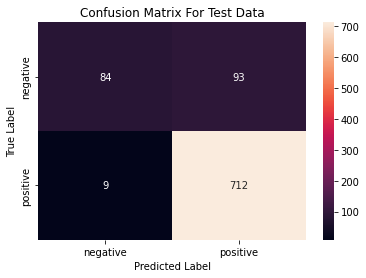

In [70]:
# confusion matrix linear

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Test_Y, predictions_SVM)
class_label = ["negative", "positive"]
test = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt="d")
plt.title("Confusion Matrix For Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

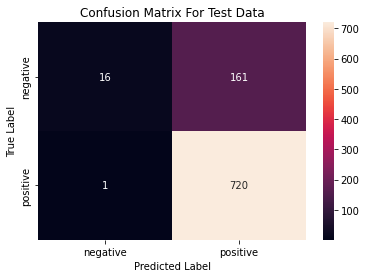

In [71]:
# confusion matrix polynomial

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Test_Y, predictions_SVM_polynomial)
class_label = ["negative", "positive"]
test = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt="d")
plt.title("Confusion Matrix For Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

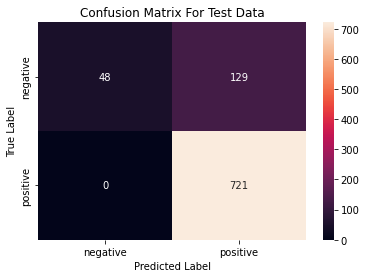

In [72]:
# confusion matrix radial

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Test_Y, predictions_SVM_radial)
class_label = ["negative", "positive"]
test = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt="d")
plt.title("Confusion Matrix For Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

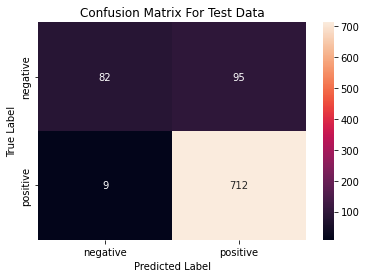

In [73]:
# confusion matrix sigmoid

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Test_Y, predictions_SVM_sigmoid)
class_label = ["negative", "positive"]
test = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt="d")
plt.title("Confusion Matrix For Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**VISUALISASI SENTIMEN NEGATIF**

In [74]:
TokopediaNeg = klasifikasiTokopedia.loc[klasifikasiTokopedia['label'] == 0]
TokopediaNeg.head()

,nama,ulasan,label
9,UTUT SUPRATMANTO,ngalamin susah login transaksi hapus instal ul...,0
13,Sope Cies,vocer dipakaiehh pesan batal prank vocher cek ...,0
18,Brigitta Christa,coba sihh bisaa pake nomor beda daftar,0
21,khena,wib wib coba cek tanggal,0
31,Nengsih Aulia Devi,pakai udh vocher mlah batal sistem aneh unfoll...,0


In [75]:
TokopediaNeg.to_csv('hasil sentimen negatif.csv')

In [76]:
import difflib

# body_list = df['body'].tolist()
neg_text_list = TokopediaNeg['ulasan'].tolist()

# body = body_list
reviews_neg = neg_text_list

In [77]:
# stopword

from nltk.corpus import stopwords
indonesian_stopwords = stopwords.words('indonesian')
print(len(indonesian_stopwords))
text_neg = str(neg_text_list)

758


In [78]:
# membuat potongan kata (token)

from nltk.tokenize import word_tokenize
tokens_neg = word_tokenize(text_neg)

In [79]:
# filter out stop word

import nltk
from nltk.corpus import stopwords
nltk.download('omw-1.4')
nltk.download('wordnet')

stop_words = set(stopwords.words('indonesian'))
negative = [w for w in tokens_neg if not w in stop_words]
extend = 'a'
negative = [w for w in negative if not w in extend]

# negative = [nltk.stem.PorterStemmer().stem(word) for word in negative]
negative = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in negative]

[nltk_data] Downloading package omw-1.4 to C:\Users\Ramdani
[nltk_data]     Adan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ramdani
[nltk_data]     Adan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [80]:
import string
table = str.maketrans('', '', string.punctuation)
strippedneg = [w.translate(table) for w in negative]

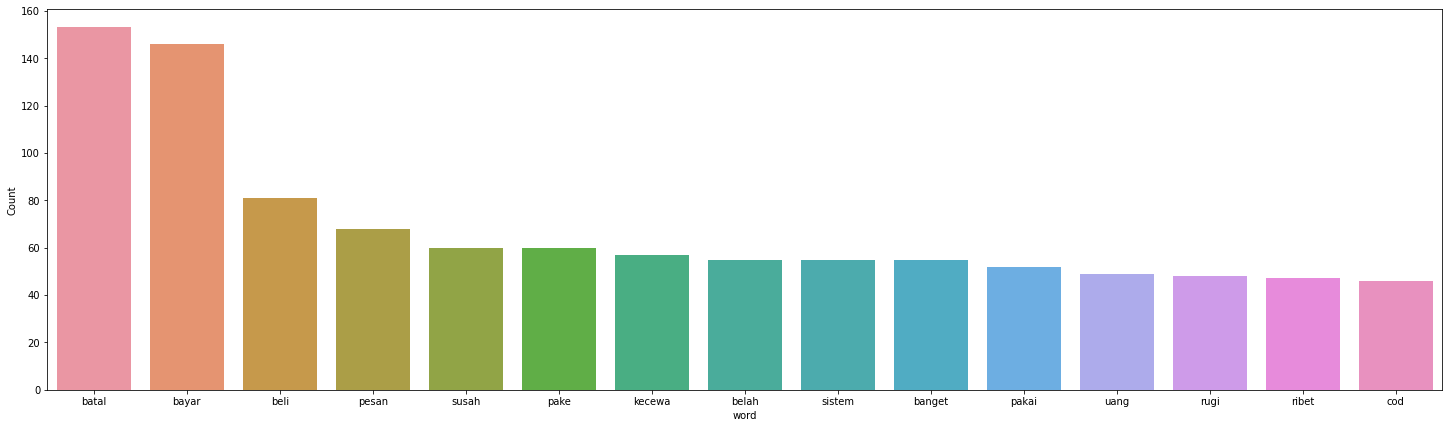

In [81]:
# memplot kata-kata yang paling sering muncul

freq_words(strippedneg, 15)

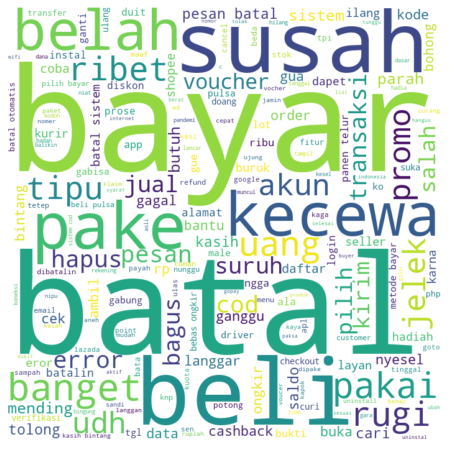

In [82]:
# wordcloud negatif

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

all_text_negative = ' '.join(str(word) for word in strippedneg)
wordcloud = WordCloud(width = 700, height = 700, max_font_size=260, background_color='white', mode='RGBA').generate(all_text_negative)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**VISUALISASI SENTIMEN POSITIVE**

In [83]:
TokopediaPos = klasifikasiTokopedia.loc[klasifikasiTokopedia['label'] == 1]
TokopediaPos.head()

,nama,ulasan,label
0,Ardison Samsung,percaya keren banget,1
1,samsudin elfani,aman emang bantu promo ongkir gratis kasih kasih,1
2,Dhika Rahmawati,akun transaksi ramai gabung unduh promo coba b...,1
3,Reza Fisabilillah,kemarin gambar buka buka gara gara sinyal down...,1
4,Haviza Yeni official,beli bayar tolong solusi,1


In [84]:
TokopediaPos.to_csv('hasil sentimen positif.csv')

In [85]:
import difflib

# body_list = df['body'].tolist()
pos_text_list = TokopediaPos['ulasan'].tolist()

# body = body_list
reviews_pos = pos_text_list

In [86]:
# stopword

from nltk.corpus import stopwords
indonesian_stopwords = stopwords.words('indonesian')
print(len(indonesian_stopwords))
text_pos = str(pos_text_list)

758


In [87]:
# membuat potongan kata (token)

from nltk.tokenize import word_tokenize
tokens_pos = word_tokenize(text_pos)

In [88]:
# filter out stop word

import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))
positive = [w for w in tokens_pos if not w in stop_words]
positive = [w for w in positive if not w in extend]

# positive = [nltk.stem.PorterStemmer().stem(word) for word in positive]
positive = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in positive]

In [89]:
import string
table = str.maketrans('', '', string.punctuation)
strippedpos = [w.translate(table) for w in positive]

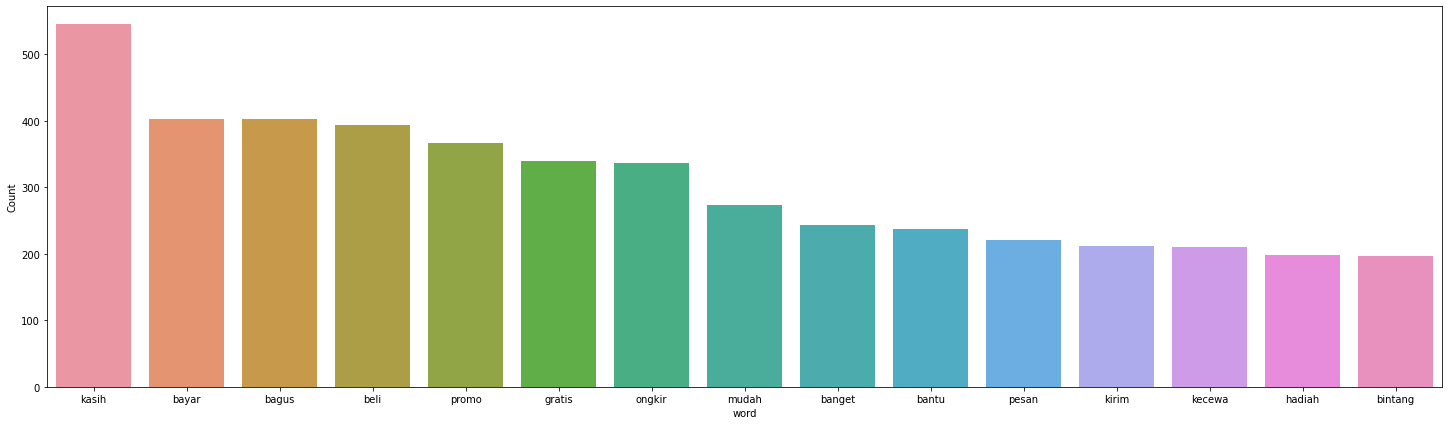

In [90]:
# memplot kata-kata yang paling sering muncul

freq_words(strippedpos, 15)

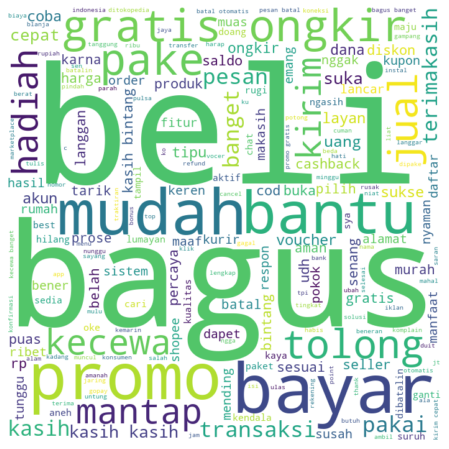

In [91]:
# wordcloud positif

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

all_text_positive = ' '.join(str(word) for word in strippedpos)
wordcloud = WordCloud(width = 700, height = 700, max_font_size=260, background_color='white', mode='RGBA').generate(all_text_positive)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

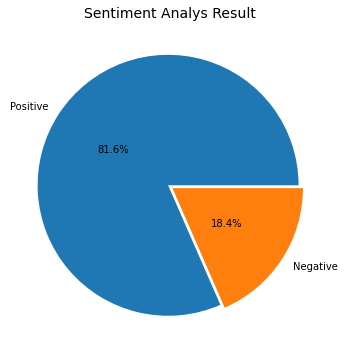

In [92]:
# pie chart

label_sentiment = ["Positive", "Negative"]
data_chart = res_df['label'].value_counts()
data_chart

pie, ax = plt.subplots(figsize=[10,6])
labels = data_chart.keys()
plt.pie(x=data_chart, autopct="%.1f%%", explode=[0.02]*2, labels=label_sentiment, pctdistance=0.5)
plt.title("Sentiment Analys Result", fontsize=14);
pie.savefig("PieChart.png")